# Diadic operations

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For use in Google Colab
%cd /content/drive/MyDrive/machine_vision/scripts/1_image_processing

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/machine_vision/scripts/1_image_processing'
C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\1_image_processing


### Green screen application

In [3]:
# Load image
image_1 = cv2.imread('../../data/greenscreen_1.jpg')
image_2 = cv2.imread('../../data/greenscreen_2.jpg')

# Convert to rgb
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

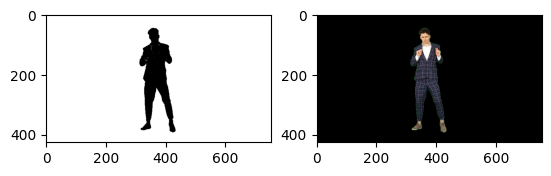

In [4]:
# Define green range
lower_range = np.array([0, 180, 0])
upper_range = np.array([200, 220, 200])

# Make mask
mask = cv2.inRange(image_1, lower_range, upper_range)

# Set all other areas to zero except where mask area 
image_1[mask != 0] = [0, 0, 0]

# Show
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image_1)
plt.show()

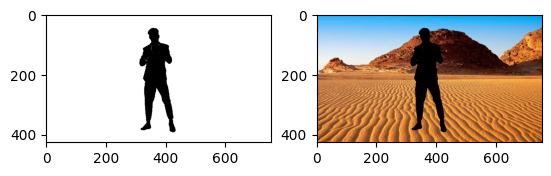

In [5]:
# Make images same size
image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]) )

# Set the mask area with black to be replaced
image_2[mask == 0 ] = [0, 0, 0]

# Show
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.show()

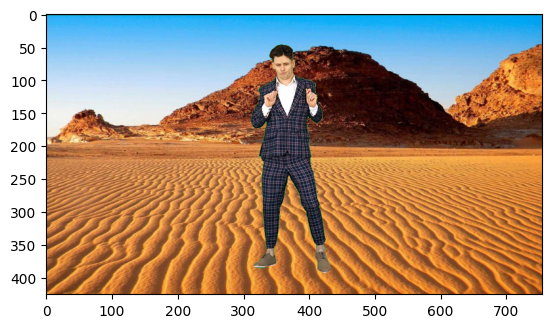

In [6]:
# Add two images
complete_image = image_1 + image_2

# Show
plt.imshow(complete_image)
plt.show()

### Movement detection

In [7]:
# Get video object
vidcap = cv2.VideoCapture('../../data/motion_detection.mp4')
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_1.jpg', image)     # save frame as JPEG file      
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_2.jpg', image)     # save frame as JPEG file  

True

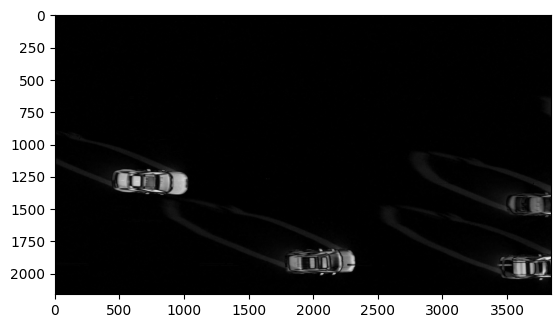

In [8]:
# Load image
image1 = cv2.imread('../../data/motion_detection_1.jpg')
image2 = cv2.imread('../../data/motion_detection_2.jpg')

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Smooth image
smooth1 = cv2.GaussianBlur(gray1, ksize=(5,5), sigmaX=0)
smooth2 = cv2.GaussianBlur(gray2, ksize=(5,5), sigmaX=0)

# Calculate difference
diff_frame = cv2.absdiff(smooth1, smooth2)

# Show
plt.imshow(diff_frame, cmap='gray')
plt.show()